#Importing The Required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import glob as gb
import cv2
import tensorflow as tf
import keras
from sklearn.model_selection import train_test_split

#Mounting Google Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')
#Dataset Path in google drive
data_path = '/content/drive/MyDrive/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#meningioma(1)الاورام السحائية, glioma(2) الاورام الدبقية, pituitary tumor(3) الاورام النخامية

#Encoding the data
code = {0:'meningioma' , 1:'glioma' , 2:'pituitary tumor'}

#Function to recall the name of the tumor
def get_code(n):
  for x,y in code.items():
    if n==x:
      return y

In [5]:
#size of the image
size = 100

In [6]:
#contains all images
all_images = []

#contains all corresponding labels
labels = []

#Loading all the images and labels
for folder in os.listdir(data_path + 'Brain Tumor'):
  files = gb.glob(pathname=str(data_path+'Brain Tumor//'+ folder+'/*.png'))
  for file in files:
    image = cv2.imread(file)
    image_array = cv2.resize(image,(size,size))
    all_images.append(list(image_array))
    labels.append(int(folder)-1)


In [7]:
#Splitting the data into Train/Test
x_train, x_test, y_train, y_test = train_test_split(all_images, labels, train_size= 0.8, random_state= 42)
##Splitting the test data into Test/Validation
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, train_size= 0.8, random_state= 42)

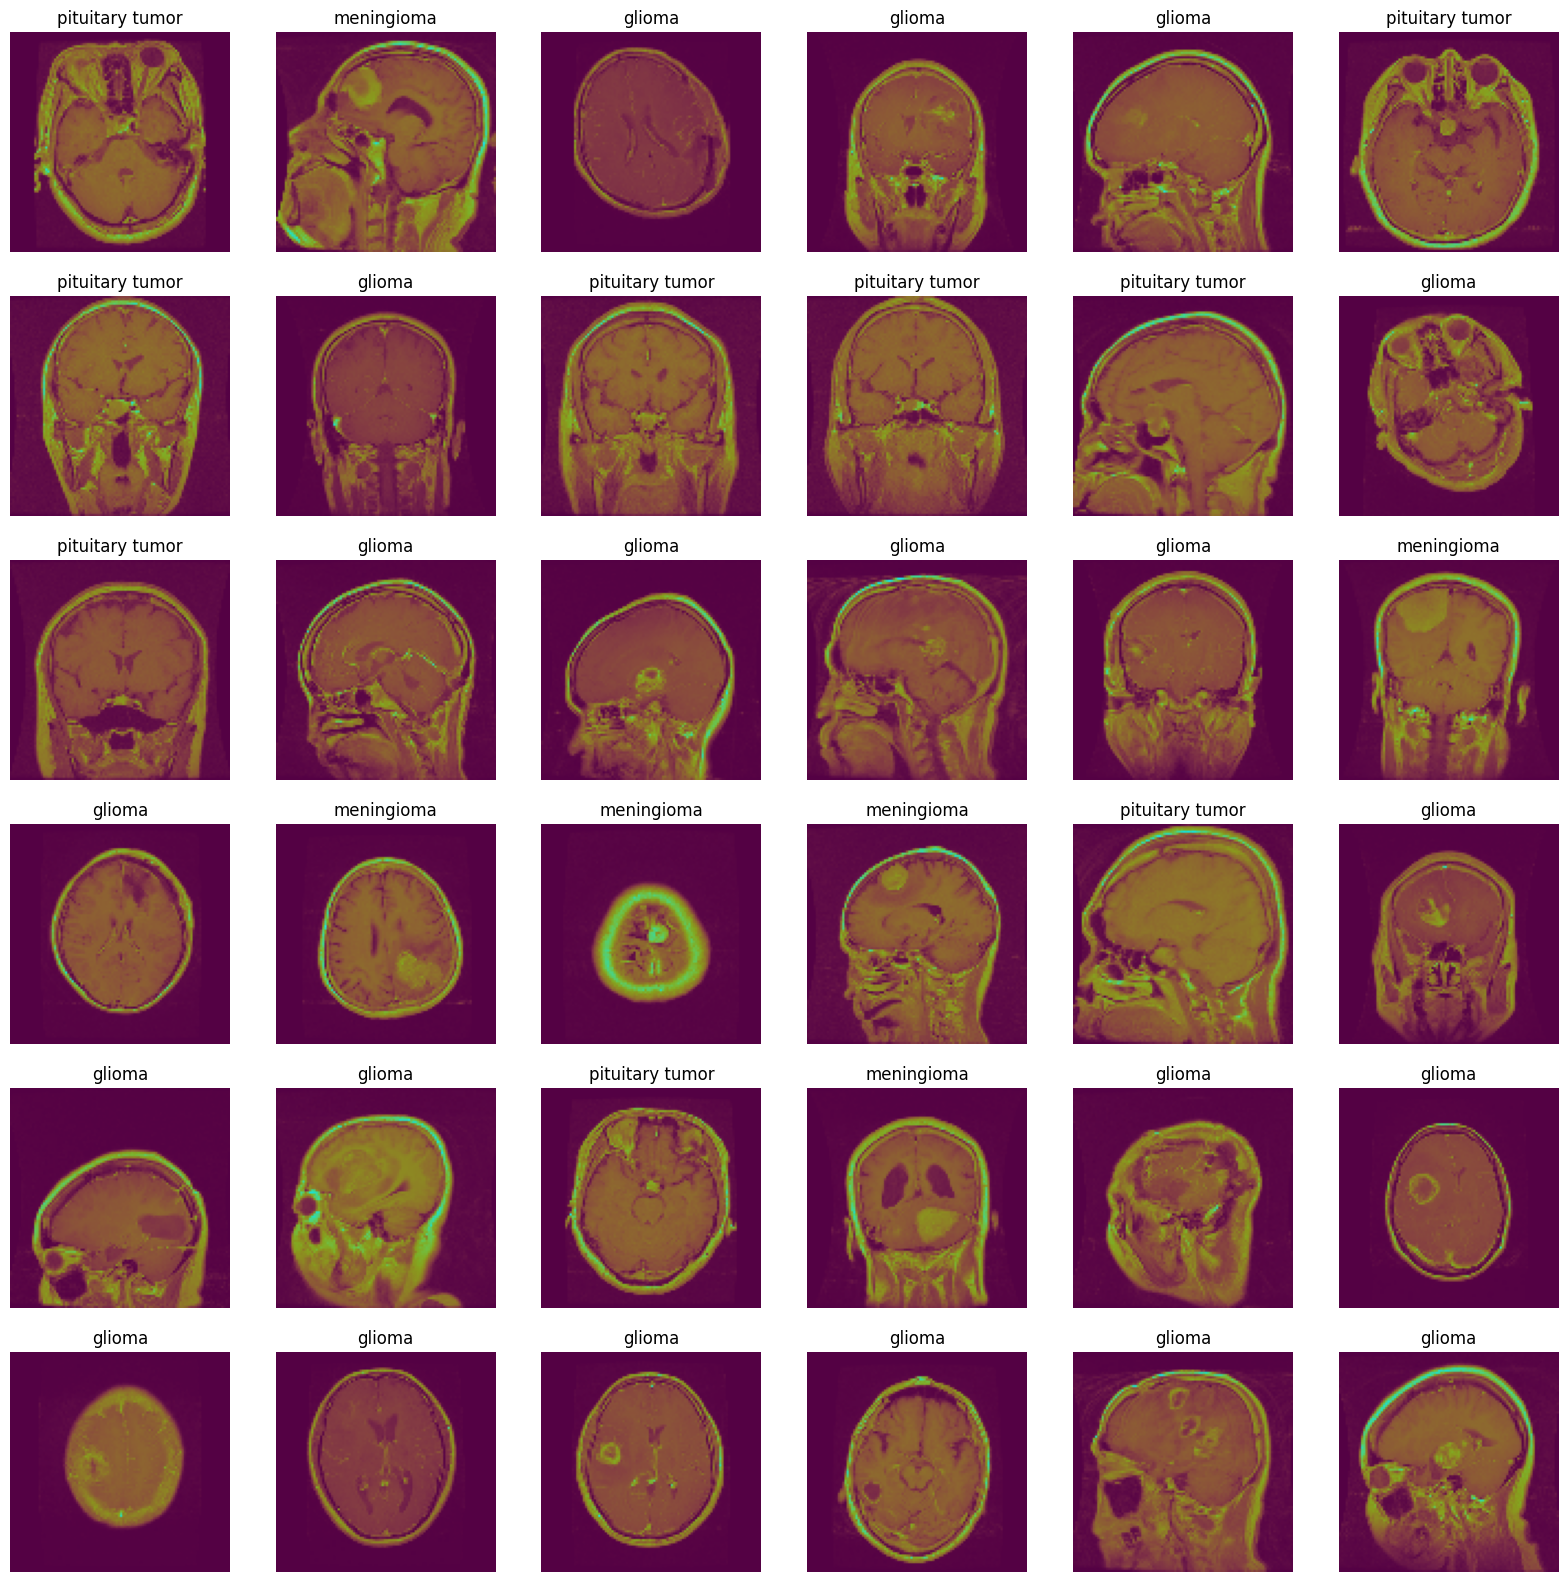

In [8]:
#Showing some pictures and their labels
plt.figure(figsize = (20,20))
for n , i in enumerate(list(np.random.randint(0,len(x_train),36))):
  plt.subplot(6,6,n+1)
  plt.imshow(x_train[i])
  plt.axis('off')
  plt.title(get_code(y_train[i]))

#Building The Model

In [9]:
Brain_Model = keras.models.Sequential([
        keras.layers.Conv2D(200,kernel_size=(3,3),activation='relu',input_shape=(size,size,3)),
        keras.layers.Conv2D(150,kernel_size=(3,3),activation='relu'),
        keras.layers.MaxPool2D(4,4),
        keras.layers.Conv2D(120,kernel_size=(3,3),activation='relu'),    
        keras.layers.Conv2D(80,kernel_size=(3,3),activation='relu'),    
        keras.layers.Conv2D(50,kernel_size=(3,3),activation='relu'),
        keras.layers.MaxPool2D(4,4),
        keras.layers.Flatten() ,    
        keras.layers.Dense(120,activation='relu') ,    
        keras.layers.Dense(100,activation='relu') ,    
        keras.layers.Dense(50,activation='relu') ,
        keras.layers.Dropout(rate=0.5) ,            
        keras.layers.Dense(3,activation='softmax') ,
])

In [10]:
Brain_Model.compile(optimizer = 'adam', loss= 'sparse_categorical_crossentropy',metrics=['accuracy'])

In [11]:
print('Model Details are : ')
print(Brain_Model.summary())

Model Details are : 
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 200)       5600      
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 150)       270150    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 150)      0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 22, 22, 120)       162120    
                                                                 
 conv2d_3 (Conv2D)           (None, 20, 20, 80)        86480     
                                                                 
 conv2d_4 (Conv2D)           (None, 18, 18, 50)        36050     
                                   

In [12]:
#Turning all data into numpy arrays for faster computation
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
x_val = np.array(x_val)
y_val = np.array(y_val)

In [13]:
#Fitting the data
Brain_Model.fit(x_train, y_train, epochs=25, batch_size =64, verbose=1)

Epoch 1/25
39/39 [==============================] - 29s 233ms/step - loss: 1.5076 - accuracy: 0.4129
Epoch 2/25
39/39 [==============================] - 7s 177ms/step - loss: 0.9046 - accuracy: 0.5908
Epoch 3/25
39/39 [==============================] - 7s 177ms/step - loss: 0.7628 - accuracy: 0.6561
Epoch 4/25
39/39 [==============================] - 7s 178ms/step - loss: 0.6644 - accuracy: 0.7009
Epoch 5/25
39/39 [==============================] - 7s 179ms/step - loss: 0.5962 - accuracy: 0.7421
Epoch 6/25
39/39 [==============================] - 7s 179ms/step - loss: 0.5151 - accuracy: 0.7789
Epoch 7/25
39/39 [==============================] - 7s 180ms/step - loss: 0.4467 - accuracy: 0.7989
Epoch 8/25
39/39 [==============================] - 7s 181ms/step - loss: 0.4318 - accuracy: 0.8103
Epoch 9/25
39/39 [==============================] - 7s 180ms/step - loss: 0.3584 - accuracy: 0.8539
Epoch 10/25
39/39 [==============================] - 7s 181ms/step - loss: 0.3051 - accuracy: 0.872

In [14]:
#Model accuracy and loss
ModelLoss, ModelAccuracy = Brain_Model.evaluate(x_test,y_test)

print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy))

16/16 [==============================] - 2s 62ms/step - loss: 0.3675 - accuracy: 0.9082
Test Loss is 0.3675382733345032
Test Accuracy is 0.9081632494926453


In [25]:
y_pred = np.argmax(Brain_Model.predict(x_test), axis=1)
y_result =  Brain_Model.predict(x_val)

4/4 [==============================] - 0s 25ms/step


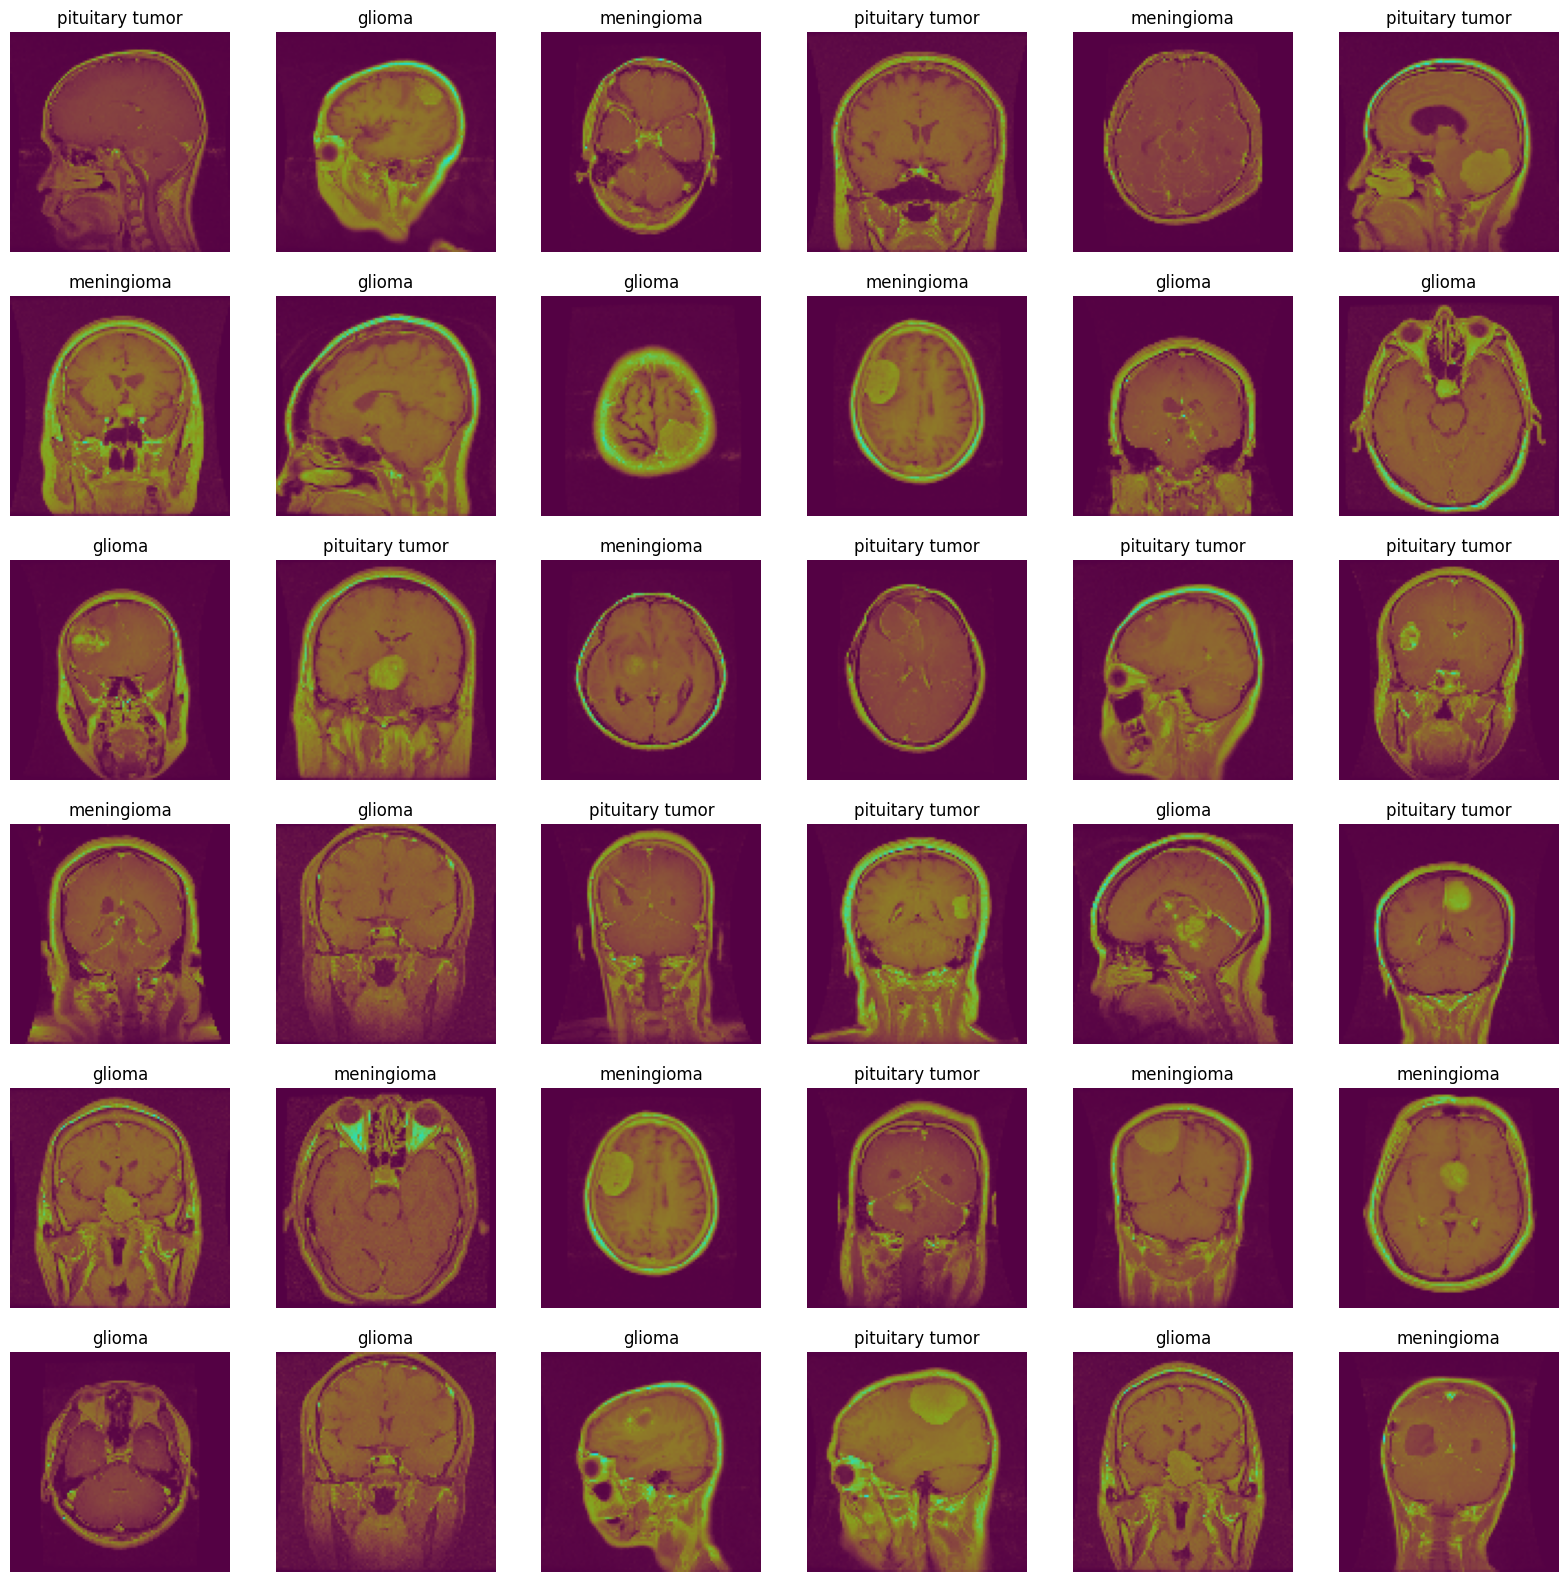

In [17]:
#Showing some pictures and their predicted labels
plt.figure(figsize = (20,20))
for n , i in enumerate(list(np.random.randint(0,len(x_val),36))):
  plt.subplot(6,6,n+1)
  plt.imshow(x_test[i])
  plt.axis('off')
  plt.title(get_code(np.argmax(y_result[i])))

#Checking Some images from the dataset

In [18]:
#meningioma(1) 
x_img = []
image1 = cv2.imread('/content/drive/MyDrive/Brain Tumor/1/2302.png')
image_array1 = cv2.resize(image1,(size,size))
x_img.append(list(image_array1))
x_img = np.array(x_img)
y_result =  Brain_Model.predict(x_img)
print(get_code(np.argmax(y_result)))


#glioma(2)
y_img = []
image1 = cv2.imread('/content/drive/MyDrive/Brain Tumor/2/104.png')
image_array1 = cv2.resize(image1,(size,size))
y_img.append(list(image_array1))
y_img = np.array(y_img)
y_result =  Brain_Model.predict(y_img)
print(get_code(np.argmax(y_result)))

#pituitary tumor(3)
z_img = []
image1 = cv2.imread('/content/drive/MyDrive/Brain Tumor/3/1002.png')
image_array1 = cv2.resize(image1,(size,size))
z_img.append(list(image_array1))
z_img = np.array(z_img)
y_result =  Brain_Model.predict(z_img)
print(get_code(np.argmax(y_result)))

1/1 [==============================] - 0s 324ms/step
meningioma
1/1 [==============================] - 0s 27ms/step
glioma
1/1 [==============================] - 0s 30ms/step
pituitary tumor


In [21]:
Brain_Model.save('/content/drive/MyDrive/Saved_Model')

# Create the confusion matrix

In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 87  22  11]
 [  6 224   2]
 [  0   4 134]]


# Create the Classification Report

In [33]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.94      0.72      0.82       120
     class 1       0.90      0.97      0.93       232
     class 2       0.91      0.97      0.94       138

    accuracy                           0.91       490
   macro avg       0.91      0.89      0.90       490
weighted avg       0.91      0.91      0.90       490

